In [6]:
import sys
sys.path.append("..")

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from global_config import *

## Modifiable Configuration

In [ ]:
import os.path as osp
#timestamp = "20250323_003538"
#timestamp = "20250324_160739" #1. no preprocess, no augmentation, no wieghted loss, no auxiliary head
# timestamp = "20250324_165259" #2. preprocess and augmentation, no weighted loss, no auxiliary head
# timestamp = "20250324_181911" #3. preprocess and augmentation, weighted loss, no auxiliary head
#tmiestamp = "20250324_183846"  #4. preprocess and augmentation, weighted loss, with auxiliary head
#timestamp = "20250324_190555" 

timestamp = "20250325_220924" # all above augmentations and CE+Dice+Lovasz (0.2:1:0.3) (decode:auxiliary heads = 1:0.4)

timestamp = "20250327_000840" # reforge, reduce complexity of auxiliary head, introduce more augmentations
log_suffix_path = f"{timestamp}/vis_data/scalars.json"
log_prefix_path = OUT_MOBILENETV3_LSRAPP_DIR_PATH
loss_metrics = ['loss', 'decode.loss_ce', "decode.loss_dice", "decode.losslovasz",\
    'aux.loss_ce', "aux.loss_lovasz", "aux.loss_dice"]
acc_metrics = ["decode.acc_seg", "aux.acc_seg"]
val_metrics = ["aAcc", "mFscore", "mIoU", "mPrecision", "mRecall", "mAcc", "mDice"]

In [9]:
log_path = osp.join(log_prefix_path, log_suffix_path)
log_vis_res_saving_prefix_path = osp.join(osp.dirname(osp.dirname(log_path)), "vis_res")
if not osp.exists(log_vis_res_saving_prefix_path):
    os.makedirs(log_vis_res_saving_prefix_path)
log_path, log_vis_res_saving_prefix_path

('/home/featurize/work/AI6126project1/out/mobilenetv3_lraspp/20250326_233740/vis_data/scalars.json',
 '/home/featurize/work/AI6126project1/out/mobilenetv3_lraspp/20250326_233740/vis_res')

In [10]:
with open(log_path, "r") as f:
    json_list = f.readlines()
type(json_list), len(json_list)

FileNotFoundError: [Errno 2] No such file or directory: '/home/featurize/work/AI6126project1/out/mobilenetv3_lraspp/20250326_233740/vis_data/scalars.json'

In [ ]:
eval(json_list[0])

{'lr': 0.00999448673244192,
 'data_time': 0.011860942840576172,
 'loss': 1.2376447796821595,
 'decode.loss_ce': 0.27556613385677337,
 'decode.loss_dice': 0.3631967008113861,
 'decode.loss_lovasz': 0.27241877019405364,
 'decode.acc_seg': 68.48319244384766,
 'aux.loss_ce': 0.12989624291658403,
 'aux.loss_dice': 0.14695029109716415,
 'aux.loss_lovasz': 0.04961666129529476,
 'aux.acc_seg': 67.66741180419922,
 'time': 0.26945760250091555,
 'iter': 100,
 'memory': 14803,
 'step': 100}

In [ ]:
df_train = pd.DataFrame()
df_val = pd.DataFrame()
for each in json_list: #?json_list[:-1]
    if "aAcc" in each:
        df_val = df_val.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [ ]:
df_val["mFscore_4_mean"] = df_val["mFscore"].rolling(window=4, min_periods=1).mean()
df_val["mIoU_4_mean"] = df_val["mIoU"].rolling(window=4, min_periods=1).mean()

In [ ]:
best_mFscore_idx = df_val["mFscore"].idxmax() 
df_val.iloc[best_mFscore_idx]["mFscore"], df_val.iloc[best_mFscore_idx]["mIoU"], df_val.iloc[best_mFscore_idx]["mAcc"], df_val.iloc[best_mFscore_idx]["mDice"]

(84.22, 69.73, 79.76, 79.79)

In [ ]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.loss_dice,decode.loss_lovasz,decode.acc_seg,aux.loss_ce,aux.loss_dice,aux.loss_lovasz,aux.acc_seg,time,iter,memory,step
0,0.009994,0.011861,1.237645,0.275566,0.363197,0.272419,68.483192,0.129896,0.146950,0.049617,67.667412,0.269458,100.0,14803.0,100.0
1,0.009989,0.014549,1.046226,0.235588,0.313754,0.269637,66.167442,0.094138,0.085325,0.047784,66.491882,0.278319,200.0,7729.0,200.0
2,0.009983,0.014035,0.942292,0.205014,0.253352,0.264606,76.670387,0.092672,0.079121,0.047527,73.863045,0.278218,300.0,7724.0,300.0
3,0.009978,0.015072,0.839172,0.165726,0.207098,0.259294,77.423035,0.084523,0.075324,0.047207,70.832916,0.274733,400.0,7728.0,400.0
4,0.009972,0.012138,0.825741,0.162262,0.196272,0.256167,80.079857,0.088379,0.075581,0.047080,72.117554,0.269512,500.0,7725.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.009127,0.012712,0.296118,0.032257,0.044388,0.081502,95.800056,0.053414,0.048009,0.036547,83.832817,0.276276,15600.0,7712.0,15600.0
156,0.009121,0.012256,0.284349,0.031187,0.043459,0.081408,92.541962,0.048697,0.043659,0.035940,78.567261,0.271672,15700.0,7712.0,15700.0
157,0.009116,0.011967,0.291575,0.031487,0.044124,0.079833,92.971771,0.052670,0.046929,0.036532,79.074501,0.272873,15800.0,7712.0,15800.0
158,0.009110,0.012894,0.280266,0.030616,0.042795,0.076335,94.725655,0.049863,0.044823,0.035833,85.224754,0.272743,15900.0,7710.0,15900.0


In [ ]:
best_mFscore_idx = df_val["mFscore"].idxmax() 
best_mFscore_idx, df_val.iloc[best_mFscore_idx]["mFscore"], df_val.iloc[best_mFscore_idx]["mIoU"], df_val.iloc[best_mFscore_idx]["mAcc"], df_val.iloc[best_mFscore_idx]["mDice"]

(25, 84.22, 69.73, 79.76, 79.79)

In [ ]:
df_val

,aAcc,mFscore,mPrecision,mRecall,mIoU,mAcc,mDice,data_time,time,step,mFscore_4_mean,mIoU_4_mean
0,76.22,52.00,52.17,14.58,11.46,14.58,13.68,0.008071,0.023421,500.0,52.000000,11.460000
1,82.40,62.05,71.89,22.32,18.65,22.32,22.86,0.001841,0.011433,1000.0,57.025000,15.055000
2,85.13,59.21,68.43,32.00,25.80,32.00,31.17,0.001981,0.011897,1500.0,57.753333,18.636667
3,86.32,62.58,74.48,40.48,32.72,40.48,39.53,0.001920,0.012146,2000.0,58.960000,22.157500
4,87.25,60.04,67.45,47.21,38.69,47.21,47.40,0.001856,0.011640,2500.0,60.970000,28.965000
5,88.69,71.12,72.20,57.72,46.63,57.72,56.15,0.001827,0.011358,3000.0,63.237500,35.960000
6,89.35,66.51,71.96,64.53,52.54,64.53,63.01,0.002022,0.012900,3500.0,65.062500,42.645000
7,90.06,73.90,77.29,69.75,58.23,69.75,70.01,0.001925,0.011728,4000.0,67.892500,49.022500
8,90.44,77.87,80.76,71.59,62.05,71.59,73.77,0.001785,0.011497,4500.0,72.350000,54.862500
9,90.64,79.86,80.76,75.08,64.46,75.08,75.65,0.001927,0.011763,5000.0,74.535000,59.320000


### trainning and validation csv

In [ ]:
df_train.to_csv(osp.join(log_vis_res_saving_prefix_path, "train_log.csv"), index=False)
df_val.to_csv(osp.join(log_vis_res_saving_prefix_path, "val_log.csv"), index=False)

In [ ]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

### training loss

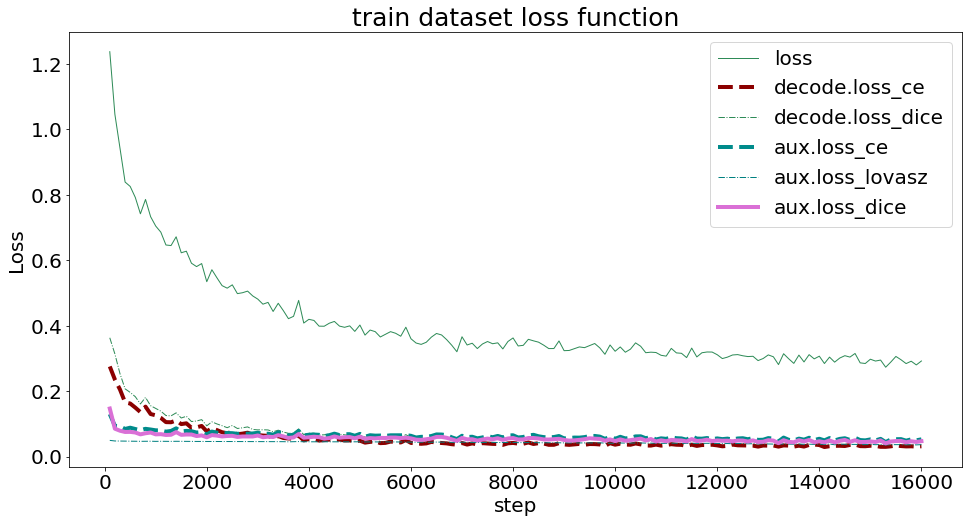

In [ ]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in loss_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('train dataset loss function', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "tran_loss.jpg"), dpi=120, bbox_inches='tight')

plt.show()

### train accuracy

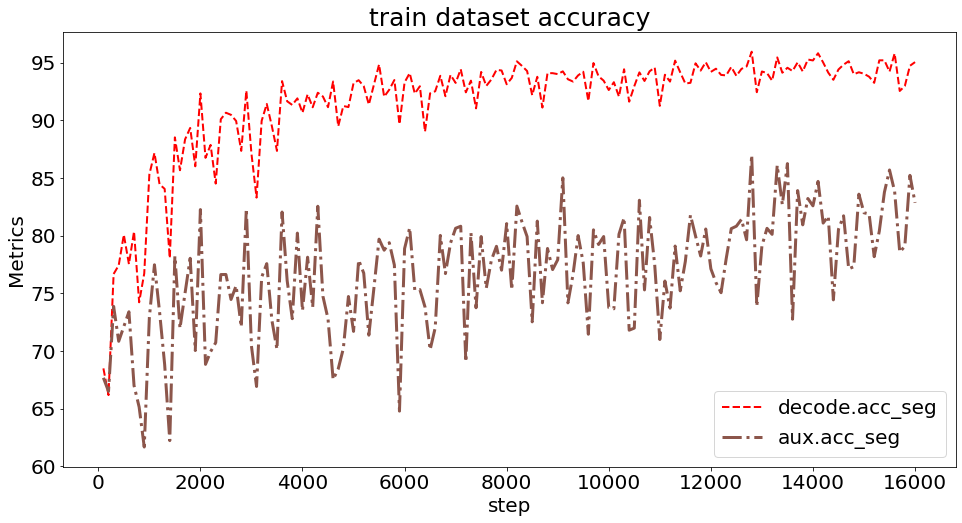

In [ ]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in acc_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('train dataset accuracy', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "train_accuracy.jpg"), dpi=120, bbox_inches='tight')

plt.show()

### validation metrics

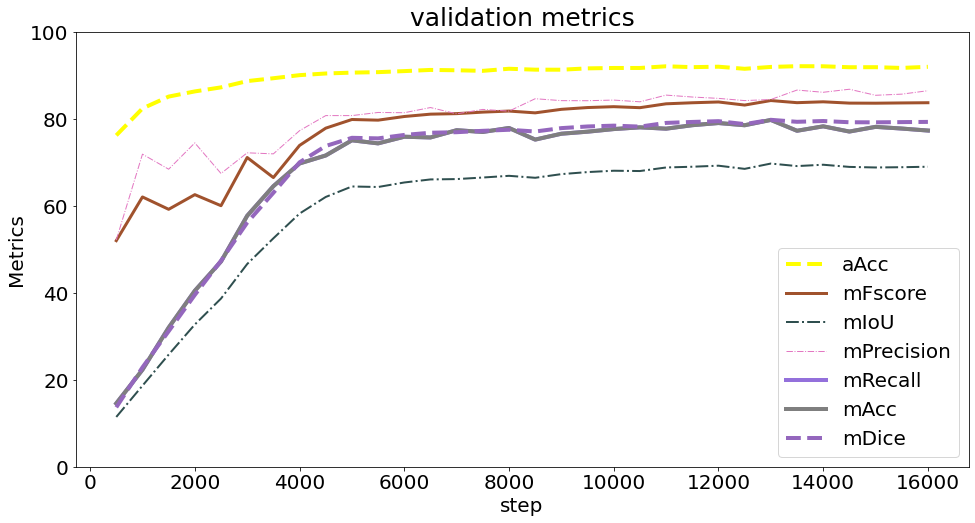

In [ ]:
plt.figure(figsize=(16, 8))

x = df_val['step']
for y in val_metrics:
    try:
        plt.plot(x, df_val[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('validation metrics', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "val_metrics.jpg"), dpi=120, bbox_inches='tight')

plt.show()